In [1]:
import pandas as pd
from sklearn.metrics import roc_auc_score,accuracy_score,confusion_matrix
import os
from pycaret.classification import *

In [2]:
# 读取数据
path = "D:/Desktop/modelV3/ct20210926.csv"
dat = pd.read_csv(path)
dat.head()

,BLINDID,BMI_AUX_CM01,HT_CM01,WT_KG01,GENDER,RACE,AGE_DERV_01,BODE_INDEX01,COPDSCORE0101,CB_VISIT1,ASTHMA_BASELINE,EYES_ENT_CONDITION01,CARDIOVASCULAR_CONDITION01,GI_CONDITION01,PULMONARY_VASCULAR_CONDITION01,ONCOLOGY_HEMA_CONDITION01,GENITOURINARY_CONDITION01,ENDOCRINE_CONDITION01,MUSCULAR_SKELETAL_CONDITION01,DERMATOLOGY_CONDITION01,INFECTIOUS_DISEASE_CONDITION01,PSYCHIATRIC_CONDITION01,CB_FATHER01,CB_MOTHER01,EMPHYSEMA_FATHER01,EMPHYSEMA_MOTHER01,COPD_FATHER01,COPD_MOTHER01,ASTHMA_FATHER01,ASTHMA_MOTHER01,LUNGCA_FATHER01,LUNGCA_MOTHER01,CB_DIAGNOSED01,MCQ_TOT01,VSASCORE01,COPD_FOUNDATION_RANKING01,CURRENT_SMOKER_V1,VGDF_EVER01,VGDF_YEARS01,LONGESTJOBDURATION01,VGDF_LONGESTJOB01,SMOKING_PACK_YEARS01,MRC01,SGR_TOTALSCORE01,AVGMINORINNERDIAM_RB2,AVGMINORINNERDIAM_LB6,AVGMINORINNERDIAM_RB1,AVGMINORINNERDIAM_RB3,AVGMINORINNERDIAM_RB5,AVGMINORINNERDIAM_RB4,AVGMINORINNERDIAM_RB6,AVGMINORINNERDIAM_LB3,AVGMINORINNERDIAM_LB4,AVGMINORINNERDIAM_LB5,AVGMINORINNERDIAM_LB8,AVGMINORINNERDIAM_RB7,AVGMINORINNERDIAM_LB1,AVGMINORINNERDIAM_LB2,AVGMINORINNERDIAM_LB9,AVGMINORINNERDIAM_LB10,AVGMINORINNERDIAM_RB8,AVGMINORINNERDIAM_RB9,AVGMINORINNERDIAM_RB10,AVGMAJORINNERDIAM_RB2,AVGMAJORINNERDIAM_LB6,AVGMAJORINNERDIAM_RB1,AVGMAJORINNERDIAM_RB3,AVGMAJORINNERDIAM_RB5,AVGMAJORINNERDIAM_RB4,AVGMAJORINNERDIAM_RB6,AVGMAJORINNERDIAM_LB3,AVGMAJORINNERDIAM_LB4,AVGMAJORINNERDIAM_LB5,AVGMAJORINNERDIAM_LB8,AVGMAJORINNERDIAM_RB7,AVGMAJORINNERDIAM_LB1,AVGMAJORINNERDIAM_LB2,AVGMAJORINNERDIAM_LB9,AVGMAJORINNERDIAM_LB10,AVGMAJORINNERDIAM_RB8,AVGMAJORINNERDIAM_RB9,AVGMAJORINNERDIAM_RB10,AVGINNERAREA_RB2,AVGINNERAREA_LB6,AVGINNERAREA_RB1,AVGINNERAREA_RB3,AVGINNERAREA_RB5,AVGINNERAREA_RB4,AVGINNERAREA_RB6,AVGINNERAREA_LB3,AVGINNERAREA_LB4,AVGINNERAREA_LB5,AVGINNERAREA_LB8,AVGINNERAREA_RB7,AVGINNERAREA_LB1,AVGINNERAREA_LB2,AVGINNERAREA_LB9,AVGINNERAREA_LB10,AVGINNERAREA_RB8,AVGINNERAREA_RB9,AVGINNERAREA_RB10,AVGAVGWALLTHICKNESS_RB2,AVGAVGWALLTHICKNESS_LB6,AVGAVGWALLTHICKNESS_RB1,AVGAVGWALLTHICKNESS_RB3,AVGAVGWALLTHICKNESS_RB5,AVGAVGWALLTHICKNESS_RB4,AVGAVGWALLTHICKNESS_RB6,AVGAVGWALLTHICKNESS_LB3,AVGAVGWALLTHICKNESS_LB4,AVGAVGWALLTHICKNESS_LB5,AVGAVGWALLTHICKNESS_LB8,AVGAVGWALLTHICKNESS_RB7,AVGAVGWALLTHICKNESS_LB1,AVGAVGWALLTHICKNESS_LB2,AVGAVGWALLTHICKNESS_LB9,AVGAVGWALLTHICKNESS_LB10,AVGAVGWALLTHICKNESS_RB8,AVGAVGWALLTHICKNESS_RB9,AVGAVGWALLTHICKNESS_RB10,AVGMINOROUTERDIAM_RB2,AVGMINOROUTERDIAM_LB6,AVGMINOROUTERDIAM_RB1,AVGMINOROUTERDIAM_RB3,AVGMINOROUTERDIAM_RB5,AVGMINOROUTERDIAM_RB4,AVGMINOROUTERDIAM_RB6,AVGMINOROUTERDIAM_LB3,AVGMINOROUTERDIAM_LB4,AVGMINOROUTERDIAM_LB5,AVGMINOROUTERDIAM_LB8,AVGMINOROUTERDIAM_RB7,AVGMINOROUTERDIAM_LB1,AVGMINOROUTERDIAM_LB2,AVGMINOROUTERDIAM_LB9,AVGMINOROUTERDIAM_LB10,AVGMINOROUTERDIAM_RB8,AVGMINOROUTERDIAM_RB9,AVGMINOROUTERDIAM_RB10,AVGMAJOROUTERDIAM_RB2,AVGMAJOROUTERDIAM_LB6,AVGMAJOROUTERDIAM_RB1,AVGMAJOROUTERDIAM_RB3,AVGMAJOROUTERDIAM_RB5,AVGMAJOROUTERDIAM_RB4,AVGMAJOROUTERDIAM_RB6,AVGMAJOROUTERDIAM_LB3,AVGMAJOROUTERDIAM_LB4,AVGMAJOROUTERDIAM_LB5,AVGMAJOROUTERDIAM_LB8,AVGMAJOROUTERDIAM_RB7,AVGMAJOROUTERDIAM_LB1,AVGMAJOROUTERDIAM_LB2,AVGMAJOROUTERDIAM_LB9,AVGMAJOROUTERDIAM_LB10,AVGMAJOROUTERDIAM_RB8,AVGMAJOROUTERDIAM_RB9,AVGMAJOROUTERDIAM_RB10,AVGOUTERAREA_RB2,AVGOUTERAREA_LB6,AVGOUTERAREA_RB1,AVGOUTERAREA_RB3,AVGOUTERAREA_RB5,AVGOUTERAREA_RB4,AVGOUTERAREA_RB6,AVGOUTERAREA_LB3,AVGOUTERAREA_LB4,AVGOUTERAREA_LB5,AVGOUTERAREA_LB8,AVGOUTERAREA_RB7,AVGOUTERAREA_LB1,AVGOUTERAREA_LB2,AVGOUTERAREA_LB9,AVGOUTERAREA_LB10,AVGOUTERAREA_RB8,AVGOUTERAREA_RB9,AVGOUTERAREA_RB10,WALL_AREA_RB2,WALL_AREA_LB6,WALL_AREA_RB1,WALL_AREA_RB3,WALL_AREA_RB5,WALL_AREA_RB4,WALL_AREA_RB6,WALL_AREA_LB3,WALL_AREA_LB4,WALL_AREA_LB5,WALL_AREA_LB8,WALL_AREA_RB7,WALL_AREA_LB1,WALL_AREA_LB2,WALL_AREA_LB9,WALL_AREA_LB10,WALL_AREA_RB8,WALL_AREA_RB9,WALL_AREA_RB10,WALL_AREA_PERC_RB2,WALL_AREA_PERC_LB6,WALL_AREA_PERC_RB1,WALL_AREA_PERC_RB3,WALL_AREA_PERC_RB5,WALL_AREA_PERC_RB4,WALL_AREA_PERC_RB6,WALL_AREA_PERC_LB3,WALL_AREA_PERC_LB4,WALL_AREA_PERC_LB5,WALL_AREA_PERC_LB8,W

In [3]:
dat["outcome"] = dat['outcome'].apply(lambda x: 1 if x == 'COPD' else 0)

In [4]:
#COPD_FOUNDATION_RANKING01
dat = dat.drop(['COPD_FOUNDATION_RANKING01'], axis=1)

In [5]:
varmiss = dat.isnull().sum()*100/ len(dat) 

In [6]:
# import numpy as np
missing_features = varmiss[varmiss > 20].index
len(missing_features.to_list())

304

In [7]:
dat.drop(missing_features, axis=1, inplace=True)

In [8]:
#划分数据集
from sklearn.model_selection import train_test_split
#data:需要进行分割的数据集
#random_state:设置随机种子，保证每次运行生成相同的随机数
#test_size:将数据分割成训练集的比例
train_set, test_set = train_test_split(dat, test_size=0.2, random_state=432, shuffle=True)
train_set.head()

,BLINDID,BMI_AUX_CM01,HT_CM01,WT_KG01,GENDER,RACE,AGE_DERV_01,BODE_INDEX01,COPDSCORE0101,CB_VISIT1,ASTHMA_BASELINE,EYES_ENT_CONDITION01,CARDIOVASCULAR_CONDITION01,GI_CONDITION01,PULMONARY_VASCULAR_CONDITION01,ONCOLOGY_HEMA_CONDITION01,GENITOURINARY_CONDITION01,ENDOCRINE_CONDITION01,MUSCULAR_SKELETAL_CONDITION01,DERMATOLOGY_CONDITION01,INFECTIOUS_DISEASE_CONDITION01,PSYCHIATRIC_CONDITION01,CB_FATHER01,CB_MOTHER01,EMPHYSEMA_FATHER01,EMPHYSEMA_MOTHER01,COPD_FATHER01,COPD_MOTHER01,ASTHMA_FATHER01,ASTHMA_MOTHER01,LUNGCA_FATHER01,LUNGCA_MOTHER01,CB_DIAGNOSED01,MCQ_TOT01,VSASCORE01,CURRENT_SMOKER_V1,VGDF_EVER01,VGDF_YEARS01,LONGESTJOBDURATION01,VGDF_LONGESTJOB01,SMOKING_PACK_YEARS01,MRC01,SGR_TOTALSCORE01,AVGMINORINNERDIAM_RB2,AVGMINORINNERDIAM_LB6,AVGMINORINNERDIAM_RB1,AVGMINORINNERDIAM_RB3,AVGMINORINNERDIAM_RB5,AVGMINORINNERDIAM_RB4,AVGMINORINNERDIAM_RB6,AVGMINORINNERDIAM_LB3,AVGMINORINNERDIAM_LB4,AVGMINORINNERDIAM_LB5,AVGMINORINNERDIAM_LB8,AVGMINORINNERDIAM_RB7,AVGMINORINNERDIAM_LB1,AVGMINORINNERDIAM_LB2,AVGMINORINNERDIAM_LB9,AVGMINORINNERDIAM_LB10,AVGMINORINNERDIAM_RB8,AVGMINORINNERDIAM_RB9,AVGMINORINNERDIAM_RB10,AVGMAJORINNERDIAM_RB2,AVGMAJORINNERDIAM_LB6,AVGMAJORINNERDIAM_RB1,AVGMAJORINNERDIAM_RB3,AVGMAJORINNERDIAM_RB5,AVGMAJORINNERDIAM_RB4,AVGMAJORINNERDIAM_RB6,AVGMAJORINNERDIAM_LB3,AVGMAJORINNERDIAM_LB4,AVGMAJORINNERDIAM_LB5,AVGMAJORINNERDIAM_LB8,AVGMAJORINNERDIAM_RB7,AVGMAJORINNERDIAM_LB1,AVGMAJORINNERDIAM_LB2,AVGMAJORINNERDIAM_LB9,AVGMAJORINNERDIAM_LB10,AVGMAJORINNERDIAM_RB8,AVGMAJORINNERDIAM_RB9,AVGMAJORINNERDIAM_RB10,AVGINNERAREA_RB2,AVGINNERAREA_LB6,AVGINNERAREA_RB1,AVGINNERAREA_RB3,AVGINNERAREA_RB5,AVGINNERAREA_RB4,AVGINNERAREA_RB6,AVGINNERAREA_LB3,AVGINNERAREA_LB4,AVGINNERAREA_LB5,AVGINNERAREA_LB8,AVGINNERAREA_RB7,AVGINNERAREA_LB1,AVGINNERAREA_LB2,AVGINNERAREA_LB9,AVGINNERAREA_LB10,AVGINNERAREA_RB8,AVGINNERAREA_RB9,AVGINNERAREA_RB10,AVGAVGWALLTHICKNESS_RB2,AVGAVGWALLTHICKNESS_LB6,AVGAVGWALLTHICKNESS_RB1,AVGAVGWALLTHICKNESS_RB3,AVGAVGWALLTHICKNESS_RB5,AVGAVGWALLTHICKNESS_RB4,AVGAVGWALLTHICKNESS_RB6,AVGAVGWALLTHICKNESS_LB3,AVGAVGWALLTHICKNESS_LB4,AVGAVGWALLTHICKNESS_LB5,AVGAVGWALLTHICKNESS_LB8,AVGAVGWALLTHICKNESS_RB7,AVGAVGWALLTHICKNESS_LB1,AVGAVGWALLTHICKNESS_LB2,AVGAVGWALLTHICKNESS_LB9,AVGAVGWALLTHICKNESS_LB10,AVGAVGWALLTHICKNESS_RB8,AVGAVGWALLTHICKNESS_RB9,AVGAVGWALLTHICKNESS_RB10,AVGMINOROUTERDIAM_RB2,AVGMINOROUTERDIAM_LB6,AVGMINOROUTERDIAM_RB1,AVGMINOROUTERDIAM_RB3,AVGMINOROUTERDIAM_RB5,AVGMINOROUTERDIAM_RB4,AVGMINOROUTERDIAM_RB6,AVGMINOROUTERDIAM_LB3,AVGMINOROUTERDIAM_LB4,AVGMINOROUTERDIAM_LB5,AVGMINOROUTERDIAM_LB8,AVGMINOROUTERDIAM_RB7,AVGMINOROUTERDIAM_LB1,AVGMINOROUTERDIAM_LB2,AVGMINOROUTERDIAM_LB9,AVGMINOROUTERDIAM_LB10,AVGMINOROUTERDIAM_RB8,AVGMINOROUTERDIAM_RB9,AVGMINOROUTERDIAM_RB10,AVGMAJOROUTERDIAM_RB2,AVGMAJOROUTERDIAM_LB6,AVGMAJOROUTERDIAM_RB1,AVGMAJOROUTERDIAM_RB3,AVGMAJOROUTERDIAM_RB5,AVGMAJOROUTERDIAM_RB4,AVGMAJOROUTERDIAM_RB6,AVGMAJOROUTERDIAM_LB3,AVGMAJOROUTERDIAM_LB4,AVGMAJOROUTERDIAM_LB5,AVGMAJOROUTERDIAM_LB8,AVGMAJOROUTERDIAM_RB7,AVGMAJOROUTERDIAM_LB1,AVGMAJOROUTERDIAM_LB2,AVGMAJOROUTERDIAM_LB9,AVGMAJOROUTERDIAM_LB10,AVGMAJOROUTERDIAM_RB8,AVGMAJOROUTERDIAM_RB9,AVGMAJOROUTERDIAM_RB10,AVGOUTERAREA_RB2,AVGOUTERAREA_LB6,AVGOUTERAREA_RB1,AVGOUTERAREA_RB3,AVGOUTERAREA_RB5,AVGOUTERAREA_RB4,AVGOUTERAREA_RB6,AVGOUTERAREA_LB3,AVGOUTERAREA_LB4,AVGOUTERAREA_LB5,AVGOUTERAREA_LB8,AVGOUTERAREA_RB7,AVGOUTERAREA_LB1,AVGOUTERAREA_LB2,AVGOUTERAREA_LB9,AVGOUTERAREA_LB10,AVGOUTERAREA_RB8,AVGOUTERAREA_RB9,AVGOUTERAREA_RB10,WALL_AREA_RB2,WALL_AREA_LB6,WALL_AREA_RB1,WALL_AREA_RB3,WALL_AREA_RB5,WALL_AREA_RB4,WALL_AREA_RB6,WALL_AREA_LB3,WALL_AREA_LB4,WALL_AREA_LB5,WALL_AREA_LB8,WALL_AREA_RB7,WALL_AREA_LB1,WALL_AREA_LB2,WALL_AREA_LB9,WALL_AREA_LB10,WALL_AREA_RB8,WALL_AREA_RB9,WALL_AREA_RB10,WALL_AREA_PERC_RB2,WALL_AREA_PERC_LB6,WALL_AREA_PERC_RB1,WALL_AREA_PERC_RB3,WALL_AREA_PERC_RB5,WALL_AREA_PERC_RB4,WALL_AREA_PERC_RB6,WALL_AREA_PERC_LB3,WALL_AREA_PERC_LB4,WALL_AREA_PERC_LB5,WALL_AREA_PERC_LB8,WALL_AREA_PERC_RB7,WALL_ARE

In [9]:
exp_clf = setup(data = train_set,                        #数据集
                target = 'outcome',                      #tag
                ignore_features = ['BLINDID'],           #模型训练期间忽略特征。它接受一个包含要忽略的列名的字符串列表。
#                 handle_unknown_categorical=False,
                session_id = 432,                        #设置随机种子，保证每次运行生成相同的随机数
                preprocess=True,                         #预处理
                numeric_imputation='median',             #缺失值处理方法
                transformation= False,                   #转型 当设置为True时，它应用幂变换使数据更像高斯。
                feature_selection=True,                  #特征选择
                feature_selection_method= 'classic',     #特征选择方法
                feature_selection_threshold = 0.01,      #用于特征选择的阈值
                data_split_stratify = True,              #数据分割分层
                fix_imbalance=True,                      #当训练集数据分布不均匀时，默认方法算法SMOTE
#                 remove_perfect_collinearity = True,
                test_data= test_set
               )  

,Description,Value
0,session_id,432
1,Target,outcome
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2301, 1388)"
5,Missing Values,True
6,Numeric Features,1353
7,Categorical Features,33
8,Ordinal Features,False
9,High Cardinality Features,False


In [10]:
# # 训练集测试集数据  train_set, test_set
X_train = get_config("X_train")
X_test = get_config("X_test")
y_train = get_config("y_train")
y_test = get_config("y_test")

In [17]:
X_train

,TLM_MEAN_rv,TLU_HU15_rv,TLL_PCT_BE_910_rv,LEFT_PCT_BE_856_rv,SGR_TOTALSCORE01,LEFT_PCT_BE_950_rv,BOTH_HU15_rv,TRM_PCT_BE_856_rv,SMOKING_PACK_YEARS01,TRL_MEAN_rv,...,RU_TOT_V_TLC,BOTH_PCT_BE_910_rv,TLM_HU15_rv,LEFT_AIR_V_rv,RIGHT_PCT_BE_950_TLC,TRM_MEAN_rv,LEFT_PCT_BE_910_rv,TRL_HU15_rv,RIGHT_MEAN_rv,RIGHT_HU15_rv
2116,-832.771790,-917.859985,16.629999,64.949997,22.449760,2.330000,-921.729980,72.459999,24.50,-850.332336,...,1101.930054,24.330000,-920.809998,2891.735352,1.84,-839.242981,21.010000,-924.039978,-843.931763,-924.549988
2698,-770.263428,-876.440002,4.160000,30.360001,43.165585,2.760000,-926.460022,63.169998,52.50,-809.933533,...,1205.583374,21.430000,-906.700012,1030.922729,26.17,-829.339966,9.910000,-932.169983,-817.514648,-939.679993
583,-632.057556,-764.795715,0.015805,0.868331,33.347355,0.064561,-766.932739,0.982253,40.00,-630.945068,...,1031.353394,0.253142,-785.526367,746.746094,0.27,-629.798706,0.161409,-761.538940,-631.243958,-762.319092
913,-762.652283,-912.169983,0.780000,31.870001,32.068424,1.260000,-894.570007,44.150002,30.00,-773.131226,...,1354.185547,8.990000,-879.869995,1220.794434,9.48,-784.928040,6.230000,-879.090027,-790.539124,-901.309998
226,-827.736816,-924.464172,11.341967,58.434311,4.876445,2.763029,-915.520752,64.495476,40.00,-825.986511,...,1296.649170,18.907471,-922.178223,2173.281738,2.72,-829.161194,20.756845,-910.662048,-829.999695,-913.229675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,-738.072449,-877.141663,2.190529,18.644245,11.085571,0.671729,-865.409729,19.457617,50.00,-745.159912,...,1728.470337,3.825407,-863.978943,1660.383667,5.55,-742.760803,3.439591,-851.392090,-747.221985,-866.097412
2656,-755.654907,-887.210999,2.513037,26.645765,3.889843,0.398517,-873.916321,23.014471,42.00,-770.587830,...,1203.753540,3.088262,-876.543518,1197.894409,3.26,-753.018494,3.765538,-873.673462,-764.751831,-870.988342
2155,-661.384827,-840.369995,0.820000,8.940000,51.151157,0.650000,-821.549988,7.250000,82.00,-595.392761,...,1219.681763,1.920000,-837.679993,941.305054,1.91,-638.034668,2.250000,-754.359985,-635.912903,-814.070007
1188,-760.208252,-928.849976,3.800000,34.230000,80.330391,4.450000,-926.059998,46.000000,50.00,-725.070129,...,1439.066406,20.620001,-910.650024,1057.698730,16.76,-782.213318,13.990000,-883.369995,-790.037720,-937.479980


In [11]:
a = y_train.to_list()
X_train.insert(X_train.shape[-1], 'outcome',a)

In [12]:
X_train.to_csv('D:/Desktop/modelV3/train1.csv')

In [13]:
b = y_test.to_list()

In [14]:
X_test.insert(X_test.shape[-1], 'outcome',b)

In [15]:
X_test.to_csv('D:/Desktop/modelV3/test1.csv')

In [10]:
compare_models(turbo=False)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.8431,0.9161,0.8483,0.8934,0.8700,0.6724,0.6744,0.0650
catboost,CatBoost Classifier,0.8418,0.9250,0.8476,0.8923,0.8691,0.6694,0.6715,2.8020
gbc,Gradient Boosting Classifier,0.8405,0.9238,0.8455,0.8921,0.8679,0.6669,0.6691,0.2520
xgboost,Extreme Gradient Boosting,0.8388,0.9172,0.8518,0.8841,0.8674,0.6618,0.6631,0.3480
ridge,Ridge Classifier,0.8357,0.0000,0.8174,0.9083,0.8603,0.6623,0.6680,0.0070
lda,Linear Discriminant Analysis,0.8357,0.9258,0.8174,0.9083,0.8603,0.6623,0.6680,0.0070
et,Extra Trees Classifier,0.8335,0.9172,0.8413,0.8854,0.8624,0.6519,0.6541,0.0570
lightgbm,Light Gradient Boosting Machine,0.8318,0.9195,0.8511,0.8745,0.8623,0.6462,0.6472,0.2080
rf,Random Forest Classifier,0.8309,0.9176,0.8420,0.8807,0.8606,0.6459,0.6476,0.1000
lr,Logistic Regression,0.8305,0.9189,0.8167,0.9005,0.8564,0.6508,0.6557,0.3780


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=432)

In [11]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9334,0.8741,0.8929,0.8834,0.6991,0.6993
1,0.8435,0.9297,0.8310,0.9077,0.8676,0.6771,0.6810
2,0.8174,0.8872,0.8451,0.8571,0.8511,0.6151,0.6152
3,0.7739,0.8968,0.8099,0.8214,0.8156,0.5235,0.5236
4,0.8435,0.9313,0.8592,0.8841,0.8714,0.6715,0.6720
5,0.8391,0.9282,0.8239,0.9070,0.8635,0.6688,0.6734
6,0.7913,0.8862,0.8380,0.8264,0.8322,0.5563,0.5564
7,0.8826,0.9408,0.8671,0.9394,0.9018,0.7565,0.7602
8,0.8565,0.9414,0.8531,0.9104,0.8809,0.7010,0.7034
9,0.8043,0.9008,0.8182,0.8603,0.8387,0.5905,0.5917


In [12]:
rf = tune_model(rf,optimize="AUC",search_library="scikit-learn")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8398,0.9309,0.8392,0.8955,0.8664,0.6670,0.6692
1,0.8348,0.9296,0.8169,0.9062,0.8593,0.6606,0.6658
2,0.8087,0.8798,0.8028,0.8769,0.8382,0.6053,0.6088
3,0.8130,0.9103,0.8028,0.8837,0.8413,0.6151,0.6193
4,0.8391,0.9276,0.8380,0.8947,0.8655,0.6660,0.6682
5,0.8391,0.9347,0.7887,0.9412,0.8582,0.6756,0.6898
6,0.8217,0.8960,0.8310,0.8741,0.8520,0.6283,0.6296
7,0.8696,0.9398,0.8322,0.9520,0.8881,0.7335,0.7430
8,0.8348,0.9424,0.8042,0.9200,0.8582,0.6624,0.6711
9,0.8130,0.9062,0.7902,0.8968,0.8401,0.6172,0.6244


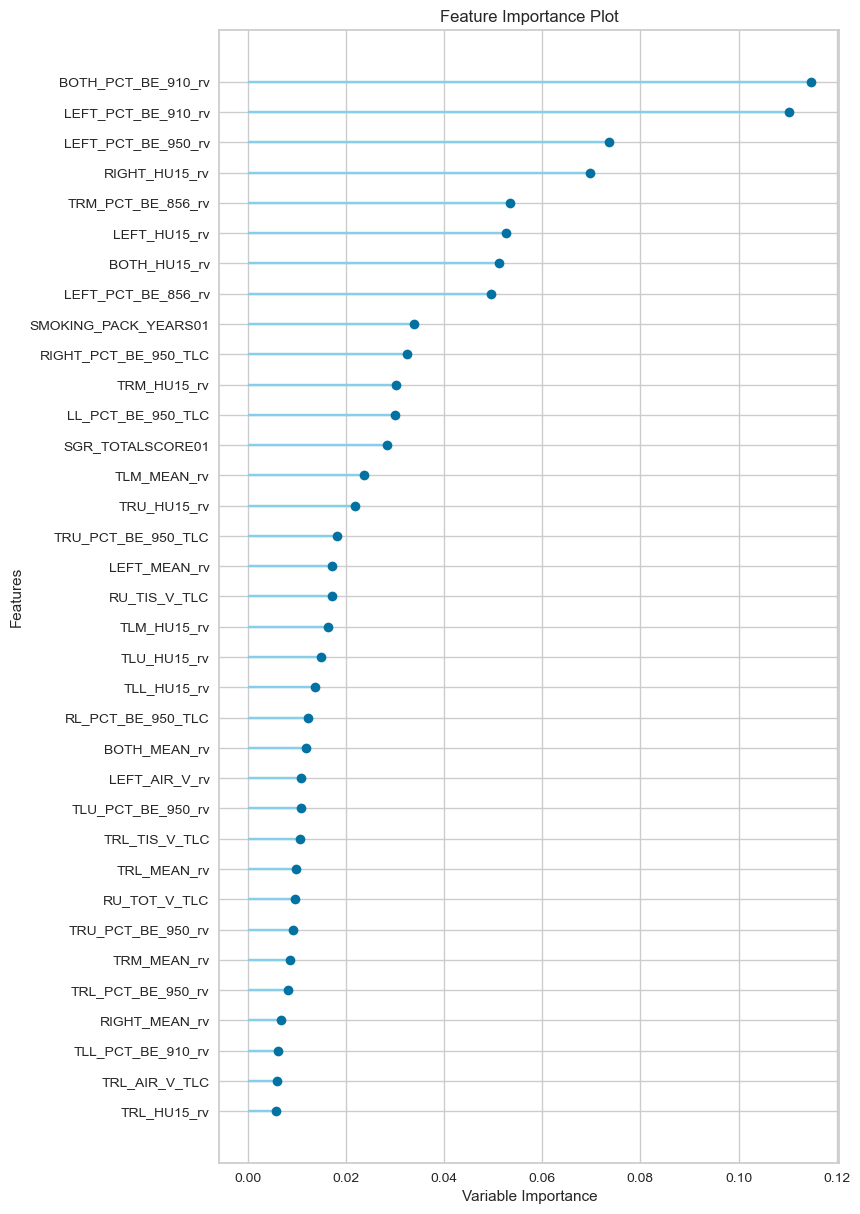

In [15]:
plot_model(rf,plot='feature_all',use_train_data=True)

In [13]:
help(plot_model)

Help on function plot_model in module pycaret.classification:

plot_model(estimator, plot: str = 'auc', scale: float = 1, save: bool = False, fold: Union[int, Any, NoneType] = None, fit_kwargs: Union[dict, NoneType] = None, groups: Union[str, Any, NoneType] = None, use_train_data: bool = False, verbose: bool = True, display_format: Union[str, NoneType] = None) -> str
    This function analyzes the performance of a trained model on holdout set. 
    It may require re-training the model in certain cases.
    
    Example
    -------
    >>> from pycaret.datasets import get_data
    >>> juice = get_data('juice')
    >>> from pycaret.classification import *
    >>> exp_name = setup(data = juice,  target = 'Purchase')
    >>> lr = create_model('lr')
    >>> plot_model(lr, plot = 'auc')
    
    
    estimator: scikit-learn compatible object
        Trained model object
    
    
    plot: str, default = 'auc'
        List of available plots (ID - Name):
    
        * 'auc' - Area Under the